#  Modèles d'espace d'état (state space model) et Modèles linéaires dynamiques (dlm) pour analyser et prédire  des séries temporelles

## 1- Modèles d'espace d'état
la modélisation de l'espace d'états est une technique pour la prévision et lissage des données de séries chronologiques. Deux composants principaux compose un modèle d'espace d'état, sont les données observées ($ y_1, \dots, y_T $)et les états non observés ($ x_1, \dots, x_T $).

**Les données observées sont conditionnellement independantes en donnant les états. Les probabilités de transition des états sont définies comme $P (x_t | x_ {t-1})$ impliquant que la propriété Markov de la probabilité de passer à l'état suivant ne dépend que de l'état précédent pour tout $t = 1, \dots, T$. La probabilité d'observer y au temps (t) est donnée par $P (y_t | x_t)$ impliquant que les données observées sont conditionnelles à l'état actuel, tel que :**
\begin{align}
x_{t+1} &= g(x_{t}) + \omega_t, \\
y_t &= f(x_t) + v_t
\end{align}
où les fonctions $f$ et $g$ sont des fonctions potentiellement nom linéaires, $x_t$ est un vecteur de variable inobsevable de dimension ($K \times 1)$,  les $\omega_t$ sont
des vecteurs aléatoires représentant le bruit d’état, les $v_t$ sont des vecteurs
aléatoires représentant le bruit de mesure. L’équation d’état formule la dynamique des variables d’état et l’équation
d’observation relie les variables observées au vecteur d’état non observé.


## 2- Modèles linéaires dynamiques (dlm)
Les modèles linéaires dynamiques sont un cas particulier des modèles d'espace d'états où les erreurs de l'état et des composants observés sont normalement distribuées. La formulation de ces modèles est la suivante :

\begin{aligned} x_0 & \sim N(m_0, C_0) \\ x_t|x_{t-1} & \sim N(G_t x_{t-1}, W_t) \\ y_t|x_t & \sim N(F_t x_t, V_t) \end{aligned}

Ce qui donne les équations suivantes:

- Une équation d'état tel que pour chaque $t = 1, \ldots, T$ on a:
\begin{align}
x_t &= F x_{t-1} + \omega_t, \\
\omega_t &\sim  N(0,W_t),\\ 
\end{align}
où les $\omega_t$ sont des vecteurs aléatoires indépendants de dimension $K$
représentant le bruit d’état, de moyenne nulle et de matrice de covariance $W_T$, et $F$ est une matrice de dimension ($K \times K$) dite matrice d’état
ou matrice de transition. On considère généralement une distribution
normale a priori sur le vecteur d’état à l’instant $t = 0$, de moyenne
$m_0$ et de matrice de covariance $C_0$ :
\begin{equation}
x_0 \sim N(m_0, C_0)
\end{equation}
- Une équation d'observation ou de mesure, tel que pour chaque $t = 1, \ldots, T$ on a:
\begin{align}
y_t &= A x_{t} + v_t, \\
v_t &\sim  N(0,V_t),\\ 
\end{align}
où les $v_t $  sont des vecteurs aléatoires indépendants de dimension $N$
représentant le bruit de mesure, de moyenne nulle et de matrice de
covariance $V_t$, et A est une matrice de dimension (N × K) dite matrice
d’observation.



| Vecteur | dimension   |Vecteur | dimension   |
|------|------|------|------|
| $y_t$  | $N \times 1$   | $A$ |$N \times K$ |
|$x_t$|   $K \times 1$ | $F$ | $K \times K$|
|$v_t$| $N \times 1$| $V_t$ | $N \times N$ |
|$\omega_t$|$K \times 1$ | $W_t$ | $K \times K$  |
|$x_0$|$K \times 1$ | $C_0$ | $K \times K$  |




La solution proposée par Kalman pour résoudre ce problème est connue sous le nom de
«Filtre de Kalman » (Kalman, 1960; Kalman, 1963). Celle-ci s’applique à
des processus aléatoires stationnaires et non stationnaires. Le filtre de Kalman est un algorithme récursif qui estime les variables non observables à l’instant t, en utilisant les informations disponibles à cette date. Ce filtre
a été initialement utilisé par des ingénieurs et des physiciens pour évaluer
l’état d’un système dynamique bruité.

Réference:
https://github.com/ChadFulton/tsa-notebooks/blob/master/code_state_space.ipynb
https://www.quantstart.com/articles/State-Space-Models-and-the-Kalman-Filter/
https://towardsdatascience.com/the-kalman-filter-and-maximum-likelihood-9861666f6742


# Exemples package pydlm 



Ce package implémente le modèle linéaire dynamique bayésien (DLM, Harrison et West, 1999) pour l'analyse des séries chronologiques dans le but de mieux comprendre les données des séries chronologiques et de prévoir l'avenir.
https://pydlm.github.io/pydlm_user_guide.html#model-components

In [7]:
# installation package

# pip install pydlm
# ou
# git clone git@github.com:wwrechard/pydlm.git pydlm
# cd pydlm
# sudo python setup.py install 
# https://pydlm.github.io/pydlm_user_guide.html#model-prediction

In [8]:
%matplotlib inline
from pydlm import dlm, trend, seasonality
import pandas as pd
import matplotlib.pyplot as plt
from pydlm import dynamic

#%matplotlib nbagg

Dans cette exemple, on utilise l'exemple du Google Data Science Post comme exemple pour montrer comment pydlm pourrait être utilisé pour analyser les données du monde réel. La données contient les dénombrements hebdomadaires des demandes initiales de chômage entre 2004 et 2012, cette donnée  est disponible dans le package R 'bsts'

In [9]:
data = pd.read_table("~/Desktop/travaille/teleTravail/ssm/data_time.csv", sep=',', index_col=0)
data.head()

,iclaimsNSA,michigan.unemployment,idaho.unemployment,pennsylvania.unemployment,unemployment.filing,new.jersey.unemployment,department.of.unemployment,illinois.unemployment,rhode.island.unemployment,unemployment.office,filing.unemployment
2004-01-04,2.536,1.488,-0.561,1.773,0.909,2.021,1.640,0.300,1.750,0.498,0.073
2004-01-11,0.882,1.100,-0.992,0.900,0.148,1.280,1.014,0.180,-0.011,0.264,0.584
2004-01-18,-0.077,1.155,-1.212,1.477,0.210,1.080,1.009,0.119,-0.028,0.031,0.448
2004-01-25,0.135,0.530,-1.034,1.244,-0.308,1.067,0.734,0.727,-0.230,-0.143,-0.269
2004-02-01,0.373,0.698,-1.195,0.643,0.570,1.125,0.502,0.598,0.625,-0.219,-1.006


In [10]:
time_series = data.iclaimsNSA
print(time_series)

2004-01-04    2.536
2004-01-11    0.882
2004-01-18   -0.077
2004-01-25    0.135
2004-02-01    0.373
              ...  
2012-08-26   -0.720
2012-09-02   -0.807
2012-09-09   -0.536
2012-09-16   -0.772
2012-09-23   -0.816
Name: iclaimsNSA, Length: 456, dtype: float64


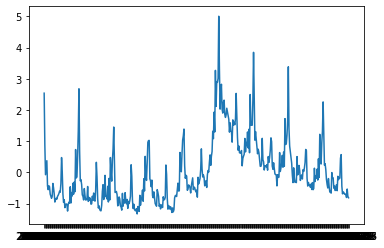

In [11]:
plt.plot(time_series)

**Cas simple du modéle lineaire dynamique DLM** 
- Parmi les modèles linéaires dynamiques utilisés pour la modélisation des
séries temporelles, l’un des plus simples est le modèle de niveau local (Local
level model). Dans ce modéle on suppose que $N$ = $K$ et que $A$ = $F$

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


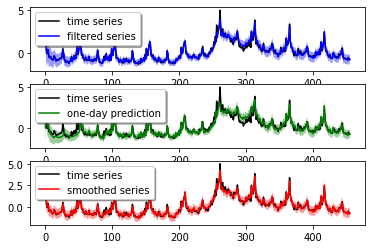

In [12]:
# A linear trend
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)
# A seasonality
seasonal52 = seasonality(period=52, discount=0.99, name='seasonal52', w=10)
# Build a simple dlm
simple_dlm = dlm(time_series) + linear_trend + seasonal52

# Fit the model
simple_dlm.fit()
# Plot the fitted results
simple_dlm.turnOff('data points')
simple_dlm.plot()


## modèle simple avec uniquement une composante de tendance linéaire et de saisonnalité locale.


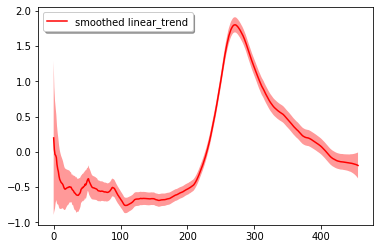

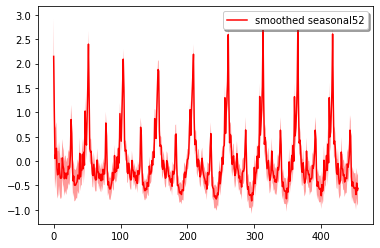

In [13]:
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal52')


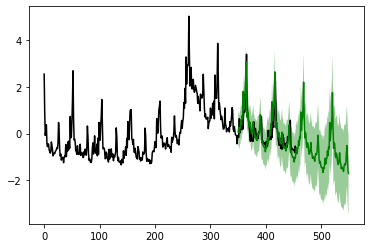

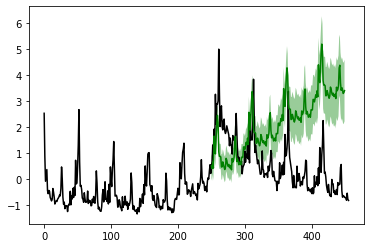

In [35]:
simple_dlm.plotPredictN(date=350, N=200)
# Plot the prediction give the first 251 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(date=250, N=200)

## modèle lineaire dynamique avec plus de parametre que le modèle simple 

In [14]:
# Build a dynamic regression model
features = data.drop('iclaimsNSA', 1)
tt =  features.transpose().values
from pydlm import dynamic
regressor10 = dynamic(features= tt.transpose(), discount=1.0, name='regressor10', w=10)
drm = dlm(time_series) + linear_trend + seasonal52 + regressor10
drm.fit()
drm.getMSE()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


0.09953059992881828

In [15]:
features

,michigan.unemployment,idaho.unemployment,pennsylvania.unemployment,unemployment.filing,new.jersey.unemployment,department.of.unemployment,illinois.unemployment,rhode.island.unemployment,unemployment.office,filing.unemployment
2004-01-04,1.488,-0.561,1.773,0.909,2.021,1.640,0.300,1.750,0.498,0.073
2004-01-11,1.100,-0.992,0.900,0.148,1.280,1.014,0.180,-0.011,0.264,0.584
2004-01-18,1.155,-1.212,1.477,0.210,1.080,1.009,0.119,-0.028,0.031,0.448
2004-01-25,0.530,-1.034,1.244,-0.308,1.067,0.734,0.727,-0.230,-0.143,-0.269
2004-02-01,0.698,-1.195,0.643,0.570,1.125,0.502,0.598,0.625,-0.219,-1.006
...,...,...,...,...,...,...,...,...,...,...
2012-08-26,-0.716,-0.312,-0.812,-0.879,0.922,-1.279,0.132,-0.540,0.369,-0.397
2012-09-02,-0.730,-0.319,-0.808,-0.659,-0.678,-1.140,0.019,-0.386,0.256,-0.359
2012-09-09,-0.728,-0.038,-0.758,-0.829,-0.864,-1.451,-0.110,-0.430,0.388,-0.200
2012-09-16,-0.808,-0.264,-0.818,-0.855,-0.878,-1.460,-0.136,-0.423,0.226,-0.343


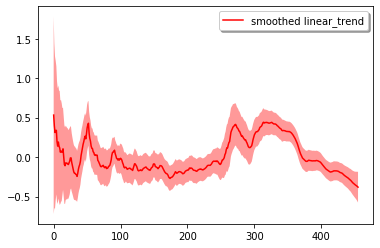

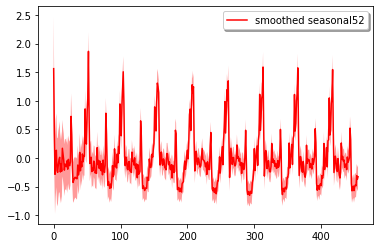

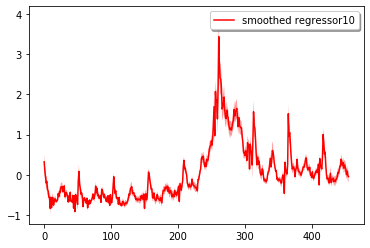

In [40]:
drm.turnOff('predict plot')
drm.turnOff('filtered plot')
drm.plot('linear_trend')
drm.plot('seasonal52')
drm.plot('regressor10')

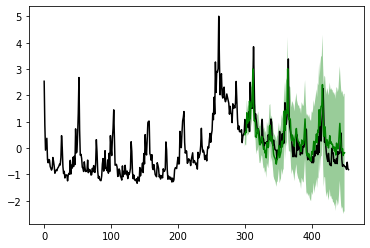

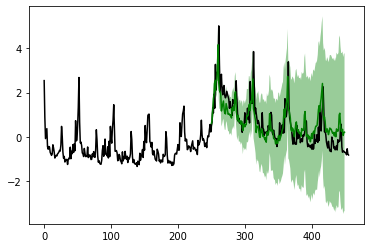

In [41]:
## predict
drm.plotPredictN(date=300, N=150)
drm.plotPredictN(date=250, N=200)